### Data Science Week 11

- Odion Joel Okonofua - johnjoel066@gmail.com - FE/23/88847286

#### Data Preprocessing


● Cleaning: Address missing values, remove duplicates, and standardize date
and location formats.


● Transformation: Normalize data for machine learning models, ensuring
consistency across all numerical features.


● Feature Engineering: Create derived variables, such as daily growth rates,
mortality ratios, and cases per population to enrich the dataset and strengthen
model insights.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("country_wise_latest.csv")
df.head(3)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa


In [5]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [6]:
print(f"Duplicates found: {df.duplicated().sum()}")

Duplicates found: 0


In [7]:
df1 = df.copy()

In [8]:
df1['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [9]:
df1['Country/Region'] = df1['Country/Region'].replace({'US': 'United States'})

In [10]:
df1['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
numerical_columns = [
    'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 
    'New deaths', 'New recovered', 'Deaths / 100 Cases', 
    'Recovered / 100 Cases', 'Deaths / 100 Recovered', 
    'Confirmed last week', '1 week change', '1 week % increase'
]

In [15]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the numerical columns
df_normalized = df1.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [16]:
import numpy as np

# Check for infinite or large values
for col in numerical_columns:
    print(f"{col}: Inf values: {np.isinf(df[col]).sum()}, Max value: {df[col].max()}")


Confirmed: Inf values: 0, Max value: 4290259
Deaths: Inf values: 0, Max value: 148011
Recovered: Inf values: 0, Max value: 1846641
Active: Inf values: 0, Max value: 2816444
New cases: Inf values: 0, Max value: 56336
New deaths: Inf values: 0, Max value: 1076
New recovered: Inf values: 0, Max value: 33728
Deaths / 100 Cases: Inf values: 0, Max value: 28.56
Recovered / 100 Cases: Inf values: 0, Max value: 100.0
Deaths / 100 Recovered: Inf values: 5, Max value: inf
Confirmed last week: Inf values: 0, Max value: 3834677
1 week change: Inf values: 0, Max value: 455582
1 week % increase: Inf values: 0, Max value: 226.32


In [17]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
# Check for infinite or large values
for col in numerical_columns:
    print(f"{col}: Inf values: {np.isinf(df[col]).sum()}, Max value: {df[col].max()}")

Confirmed: Inf values: 0, Max value: 4290259
Deaths: Inf values: 0, Max value: 148011
Recovered: Inf values: 0, Max value: 1846641
Active: Inf values: 0, Max value: 2816444
New cases: Inf values: 0, Max value: 56336
New deaths: Inf values: 0, Max value: 1076
New recovered: Inf values: 0, Max value: 33728
Deaths / 100 Cases: Inf values: 0, Max value: 28.56
Recovered / 100 Cases: Inf values: 0, Max value: 100.0
Deaths / 100 Recovered: Inf values: 0, Max value: 3259.26
Confirmed last week: Inf values: 0, Max value: 3834677
1 week change: Inf values: 0, Max value: 455582
1 week % increase: Inf values: 0, Max value: 226.32


In [19]:
print(df.isnull().sum())


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [20]:
# Fill NaN with median of the column
df['Deaths / 100 Recovered'].fillna(df['Deaths / 100 Recovered'].median(), inplace=True)


In [21]:
print(df.isnull().sum())


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 
                     'New deaths', 'New recovered', 'Deaths / 100 Cases', 
                     'Recovered / 100 Cases', 'Deaths / 100 Recovered', 
                     'Confirmed last week', '1 week change', '1 week % increase']

# Normalize numerical columns
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [23]:
df_normalized[numerical_columns]

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,0.008450,0.008574,0.013645,3.478145e-03,0.001882,0.009294,0.000534,0.122549,0.6949,0.001546,0.009262,0.001721,0.025678
1,0.001135,0.000973,0.001486,7.069198e-04,0.002077,0.005576,0.001868,0.103291,0.5625,0.001611,0.001085,0.001659,0.090546
2,0.006518,0.007858,0.010201,2.830875e-03,0.010934,0.007435,0.022207,0.145658,0.6734,0.001893,0.006176,0.009501,0.095195
3,0.000209,0.000351,0.000435,1.846300e-05,0.000178,0.000000,0.000000,0.200630,0.8853,0.001988,0.000228,0.000154,0.027981
4,0.000219,0.000277,0.000131,2.368235e-04,0.000320,0.000929,0.000000,0.151261,0.2547,0.005197,0.000193,0.000544,0.133299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.002473,0.000527,0.002032,2.411197e-03,0.002698,0.001859,0.000000,0.025560,0.3533,0.000638,0.002322,0.003845,0.099757
183,0.000000,0.000007,0.000004,3.550577e-07,0.000000,0.000000,0.000000,0.350140,0.8000,0.003835,0.000000,0.000103,0.016684
184,0.000392,0.003263,0.000451,1.331466e-04,0.000178,0.003717,0.001067,1.000000,0.4926,0.017789,0.000420,0.000261,0.036018
185,0.001059,0.000946,0.001524,5.670271e-04,0.001260,0.000929,0.013787,0.107843,0.6184,0.001525,0.000865,0.002794,0.176834


In [25]:
# Feature Engineering
df['Confirmed Growth Rate'] = df['Confirmed'].diff() / df['Confirmed'].shift(1)
df['Deaths Growth Rate'] = df['Deaths'].diff() / df['Deaths'].shift(1)
df['Recovered Growth Rate'] = df['Recovered'].diff() / df['Recovered'].shift(1)

df['Mortality Ratio'] = df['Deaths'] / df['Confirmed']
df['Recovery Ratio'] = df['Recovered'] / df['Confirmed']


df['Recovery Rate Change'] = df['Recovery Ratio'].diff()
df['Mortality Rate Change'] = df['Mortality Ratio'].diff()

df['7-Day Confirmed MA'] = df['Confirmed'].rolling(window=7).mean()
df['7-Day Deaths MA'] = df['Deaths'].rolling(window=7).mean()

# Show the updated dataset with new features
df.head(5)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,WHO Region,Confirmed Growth Rate,Deaths Growth Rate,Recovered Growth Rate,Mortality Ratio,Recovery Ratio,Recovery Rate Change,Mortality Rate Change,7-Day Confirmed MA,7-Day Deaths MA
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,...,Eastern Mediterranean,NaN,NaN,NaN,0.034994,0.694868,NaN,NaN,NaN,NaN
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,...,Europe,-0.865428,-0.886525,-0.891063,0.029508,0.562500,-0.132368,-0.005486,NaN,NaN
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,...,Africa,4.732172,7.076389,5.862295,0.041576,0.673399,0.110899,0.012068,NaN,NaN
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,...,Europe,-0.967576,-0.955288,-0.957371,0.057332,0.885336,0.211937,0.015756,NaN,NaN
4,Angola,950,41,242,667,18,1,0,4.32,25.47,...,Africa,0.047409,-0.211538,-0.698630,0.043158,0.254737,-0.630599,-0.014174,NaN,NaN


In [26]:
print(df.isnull().sum())


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
Confirmed Growth Rate     1
Deaths Growth Rate        4
Recovered Growth Rate     1
Mortality Ratio           0
Recovery Ratio            0
Recovery Rate Change      1
Mortality Rate Change     1
7-Day Confirmed MA        6
7-Day Deaths MA           6
dtype: int64


In [37]:
# Forward fill for missing values, then backward fill if any still remain
df.ffill(inplace=True)  # Fill missing values forward
df.bfill(inplace=True)  # Fill any remaining missing values backward


In [39]:
print(df.isnull().sum())


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
Confirmed Growth Rate     0
Deaths Growth Rate        0
Recovered Growth Rate     0
Mortality Ratio           0
Recovery Ratio            0
Recovery Rate Change      0
Mortality Rate Change     0
7-Day Confirmed MA        0
7-Day Deaths MA           0
dtype: int64


#### Exploratory Data Analysis (EDA)


● Objective: Conduct EDA to uncover trends, correlations, and outliers in the
data.


● Visualizations: Use charts like line plots, bar charts, and scatter plots to
analyze COVID-19 trends, such as case and mortality rates over time.

    
● Key Insights: Focus on identifying demographic and environmental factors
that could influence the spread and severity of COVID-19 cases.



### Model Development


● Machine Learning Models: Apply predictive models such as

:○ Time-Series Model

s
○ Classification Mod



els
● Evaluation: Assess model performance with accuracy, precision, recall,
F1-score, or RMSE, as applicable.

In [41]:
# Basic info about the dataset (data types, non-null counts)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [43]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,8.813094e+04,383318.663831,10.000000,1114.000000,5059.000000,40460.500000,4.290259e+06
Deaths,187.0,3.497519e+03,14100.002482,0.000000,18.500000,108.000000,734.000000,1.480110e+05
Recovered,187.0,5.063148e+04,190188.189643,0.000000,626.500000,2815.000000,22606.000000,1.846641e+06
Active,187.0,3.400194e+04,213326.173371,0.000000,141.500000,1600.000000,9149.000000,2.816444e+06
New cases,187.0,1.222957e+03,5710.374790,0.000000,4.000000,49.000000,419.500000,5.633600e+04
New deaths,187.0,2.895722e+01,120.037173,0.000000,0.000000,1.000000,6.000000,1.076000e+03
New recovered,187.0,9.338128e+02,4197.719635,0.000000,0.000000,22.000000,221.000000,3.372800e+04
Deaths / 100 Cases,187.0,3.019519e+00,3.454302,0.000000,0.945000,2.150000,3.875000,2.856000e+01
Recovered / 100 Cases,187.0,6.482053e+01,26.287694,0.000000,48.770000,71.320000,86.885000,1.000000e+02
Deaths / 100 Recovered,187.0,3.956957e+01,332.167260,0.000000,1.450000,3.580000,6.190000,3.259260e+03


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Afghanistan'

<Figure size 1200x800 with 0 Axes>

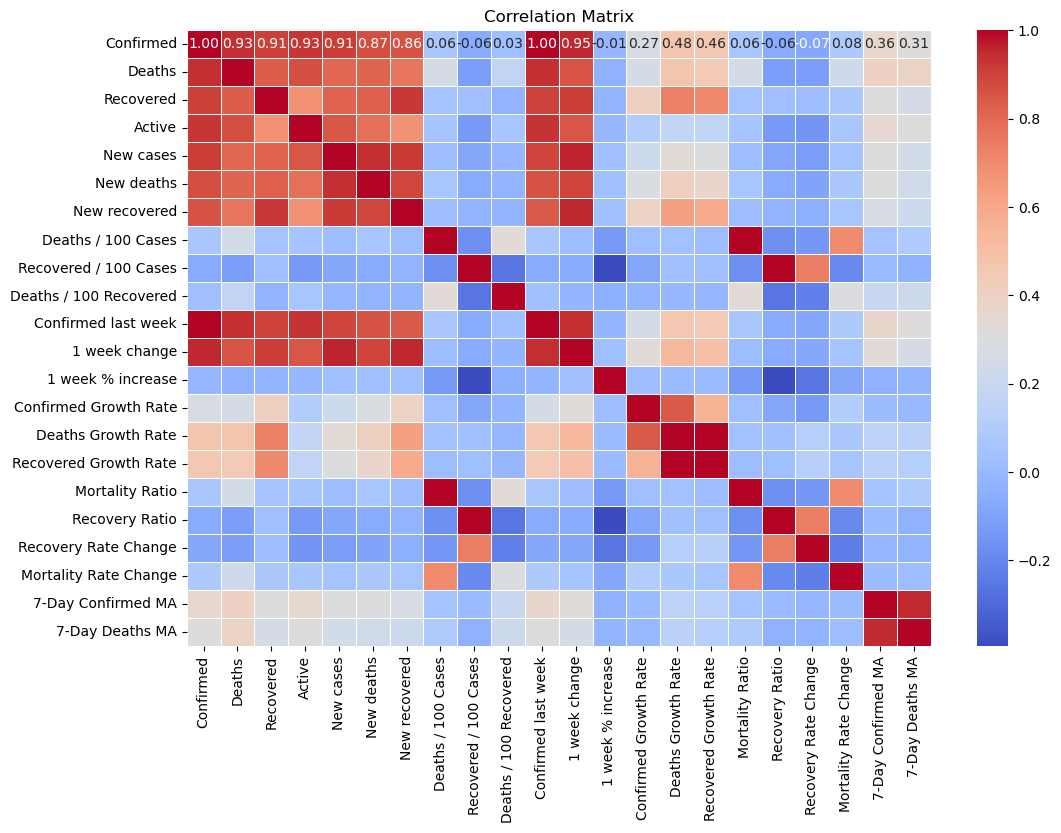

In [51]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


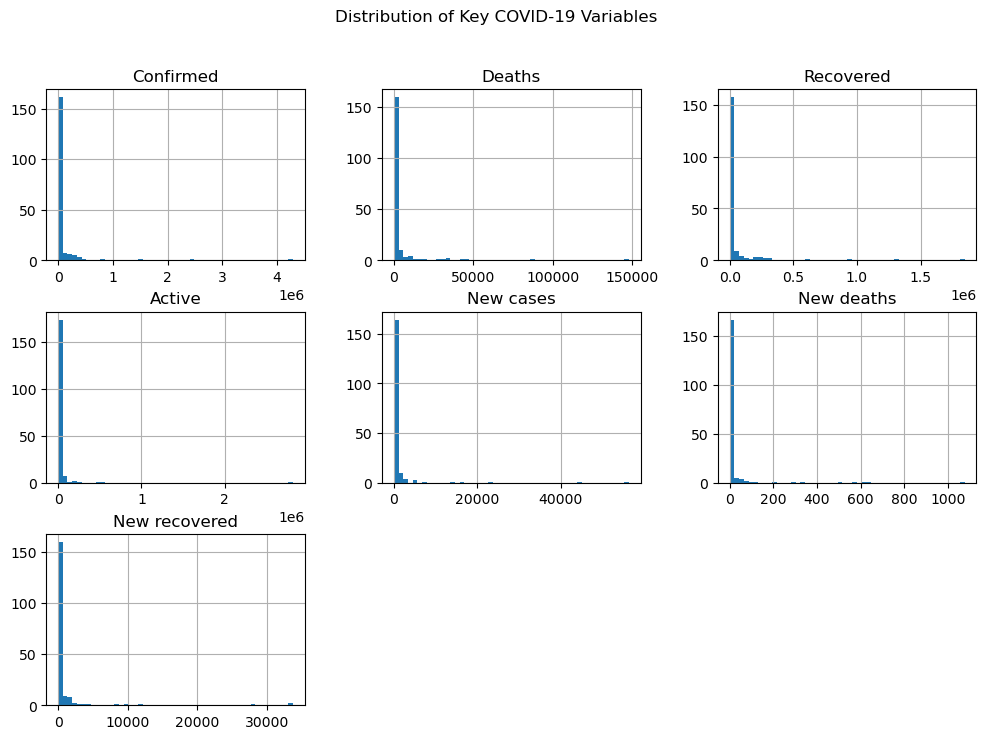

In [52]:
# Plot histograms for key variables to see their distribution
df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].hist(bins=50, figsize=(12, 8))
plt.suptitle('Distribution of Key COVID-19 Variables')
plt.show()


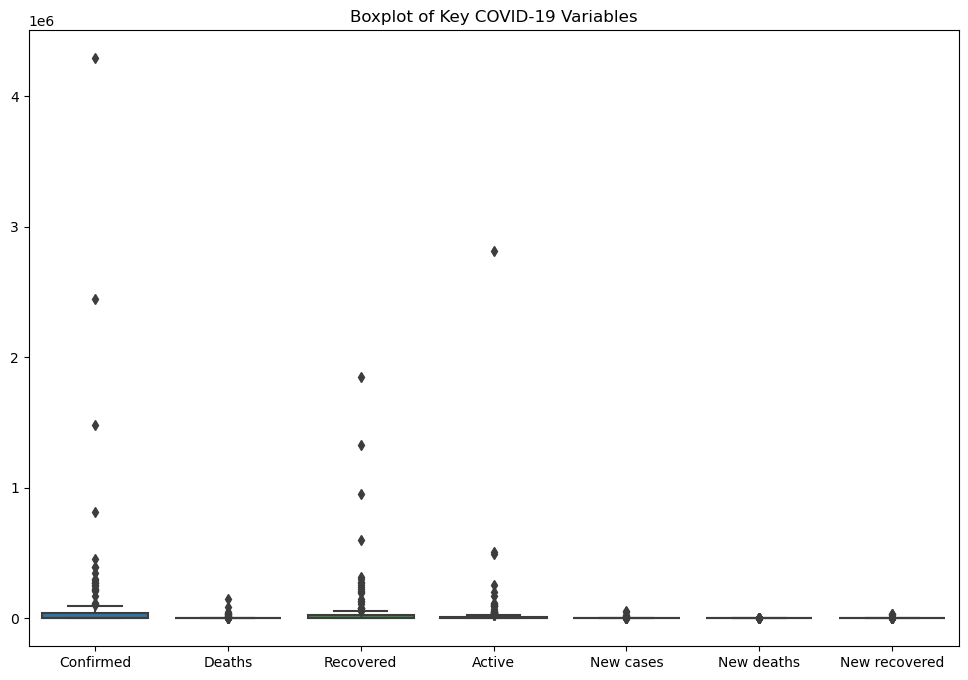

In [53]:
# Boxplots for the key COVID-19 variables to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']])
plt.title('Boxplot of Key COVID-19 Variables')
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

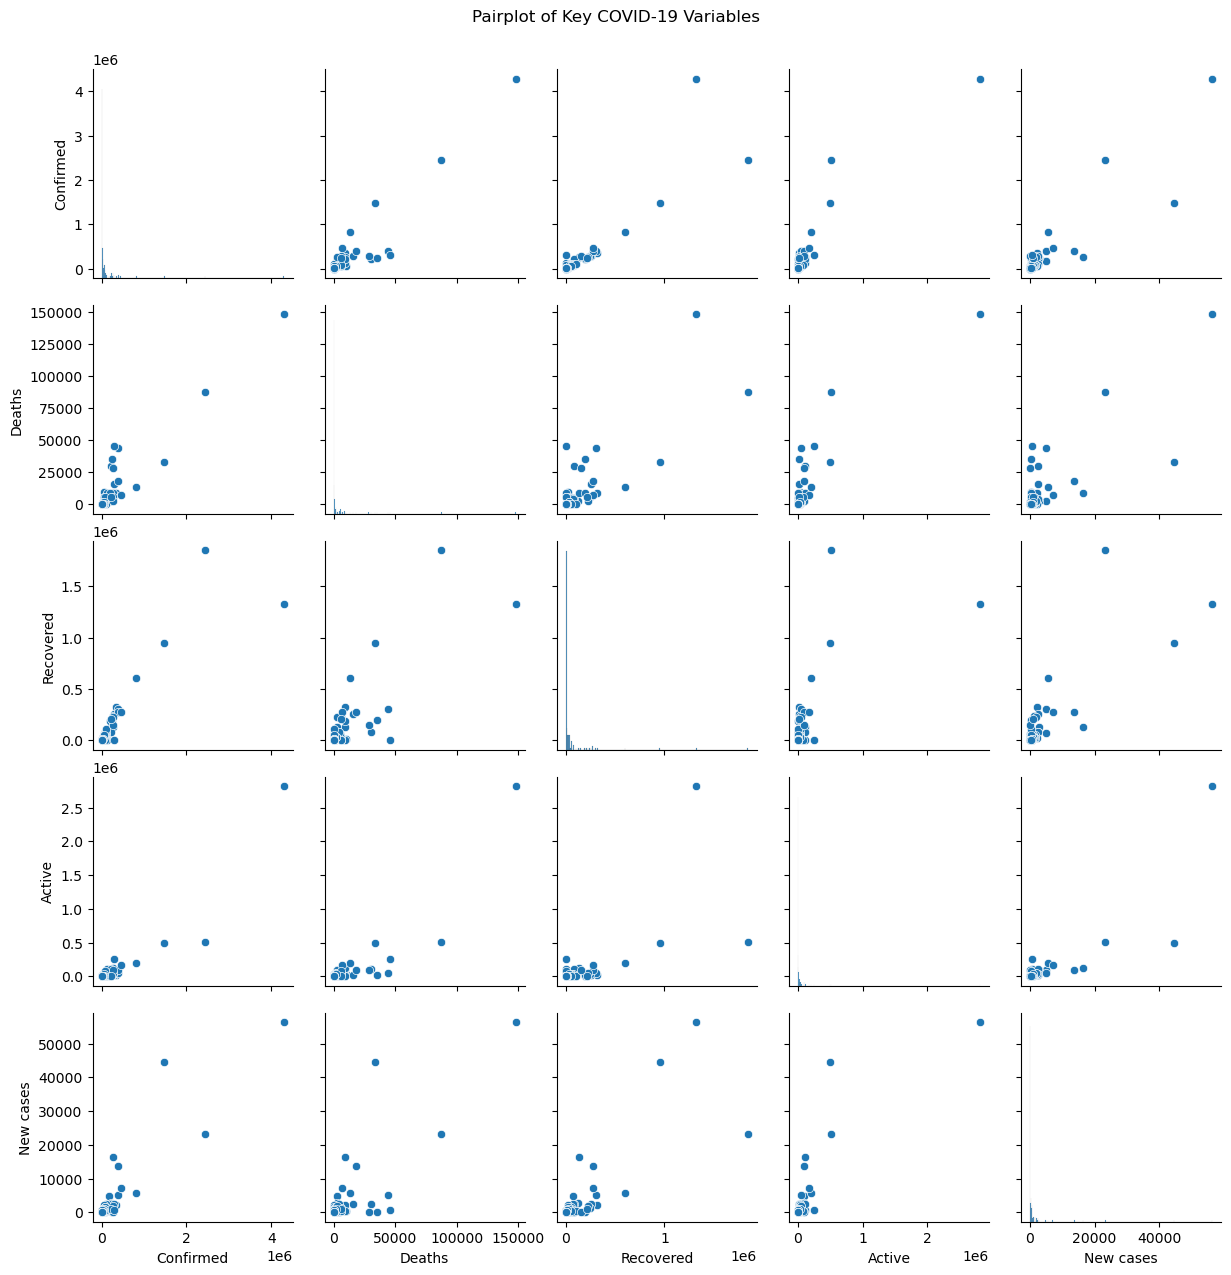

In [54]:
# Visualizing pairwise relationships between key variables using pairplot
sns.pairplot(df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']])
plt.suptitle('Pairplot of Key COVID-19 Variables', y=1.02)
plt.show()


In [59]:
from scipy.stats import zscore

# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]))
df_clean = df[(z_scores < 3).all(axis=1)]  # Keep data within 3 standard deviations


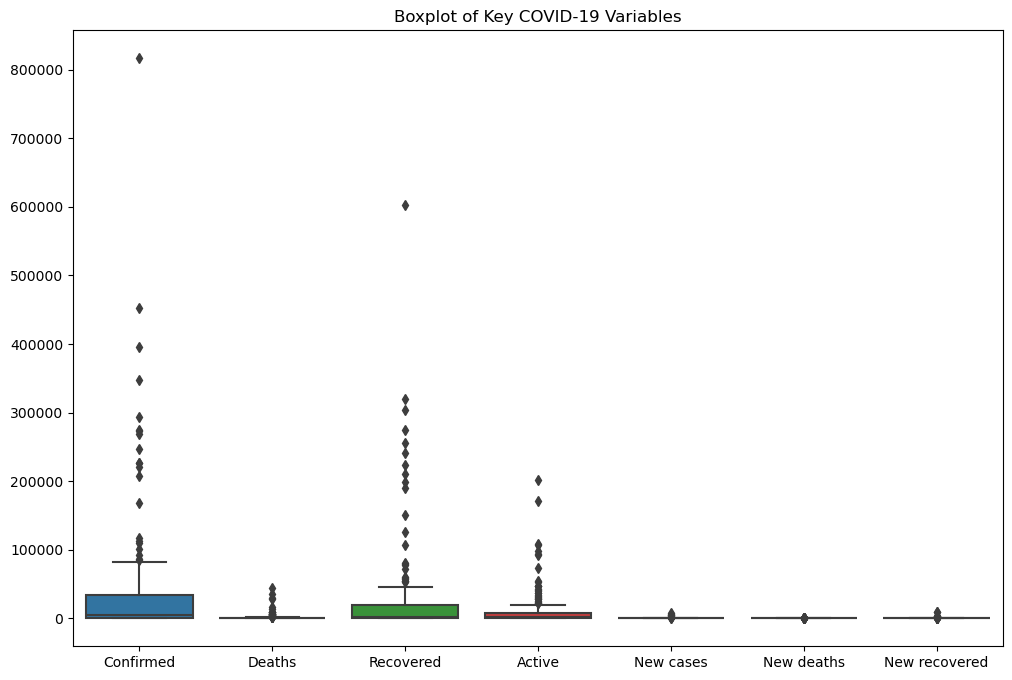

In [61]:
# Boxplots for the key COVID-19 variables to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']])
plt.title('Boxplot of Key COVID-19 Variables')
plt.show()


In [62]:
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_clean.shape[0]}")


Original dataset size: 187
Cleaned dataset size: 181


In [63]:
plt.figure(figsize=(12, 6))
for country in df['Country/Region'].head(5):  # Display for the first 5 countries
    country_data = df[df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)
plt.title('Confirmed COVID-19 Cases Over Time (Top 5 Countries)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Country/Region', loc='upper left')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Date'

<Figure size 1200x600 with 0 Axes>

In [64]:
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region', 'Confirmed Growth Rate', 'Deaths Growth Rate',
       'Recovered Growth Rate', 'Mortality Ratio', 'Recovery Ratio',
       'Recovery Rate Change', 'Mortality Rate Change', '7-Day Confirmed MA',
       '7-Day Deaths MA'],
      dtype='object')


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


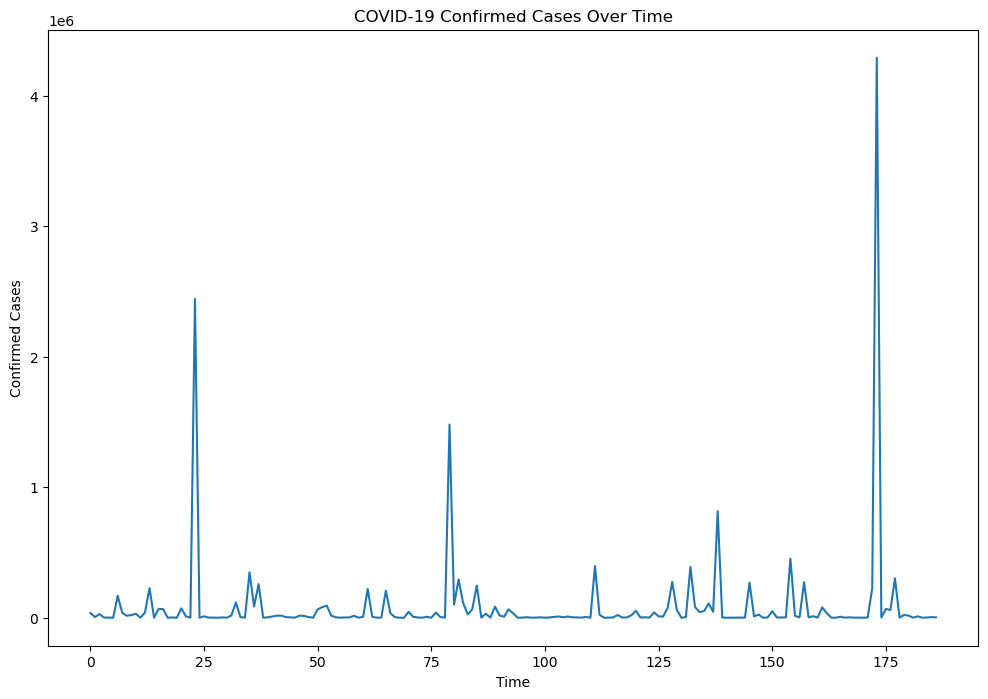

In [65]:
# Create a synthetic time index if no date column exists
df['Time'] = np.arange(len(df))  # Sequential time periods (e.g., week 1, week 2...)

# Plotting line chart for confirmed cases over synthetic time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Time', y='Confirmed', data=df)
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.show()


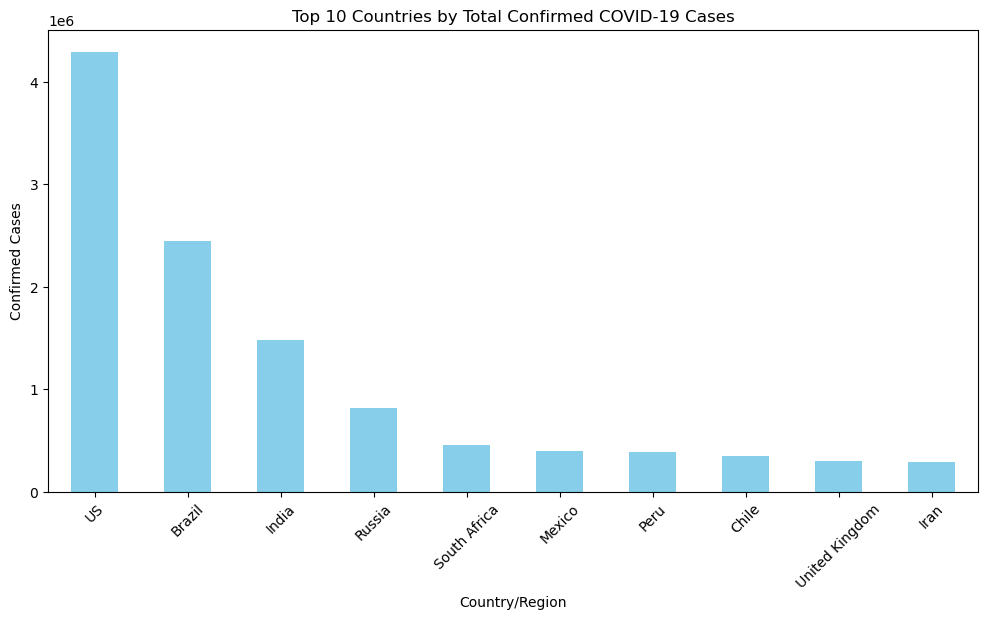

In [66]:
# Sort by the confirmed cases and display the top 10
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


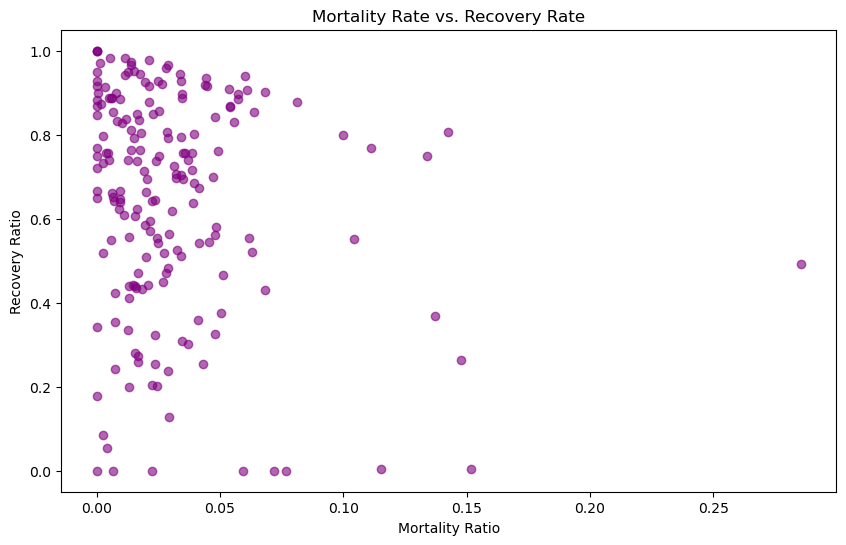

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mortality Ratio'], df['Recovery Ratio'], color='purple', alpha=0.6)
plt.title('Mortality Rate vs. Recovery Rate')
plt.xlabel('Mortality Ratio')
plt.ylabel('Recovery Ratio')
plt.show()


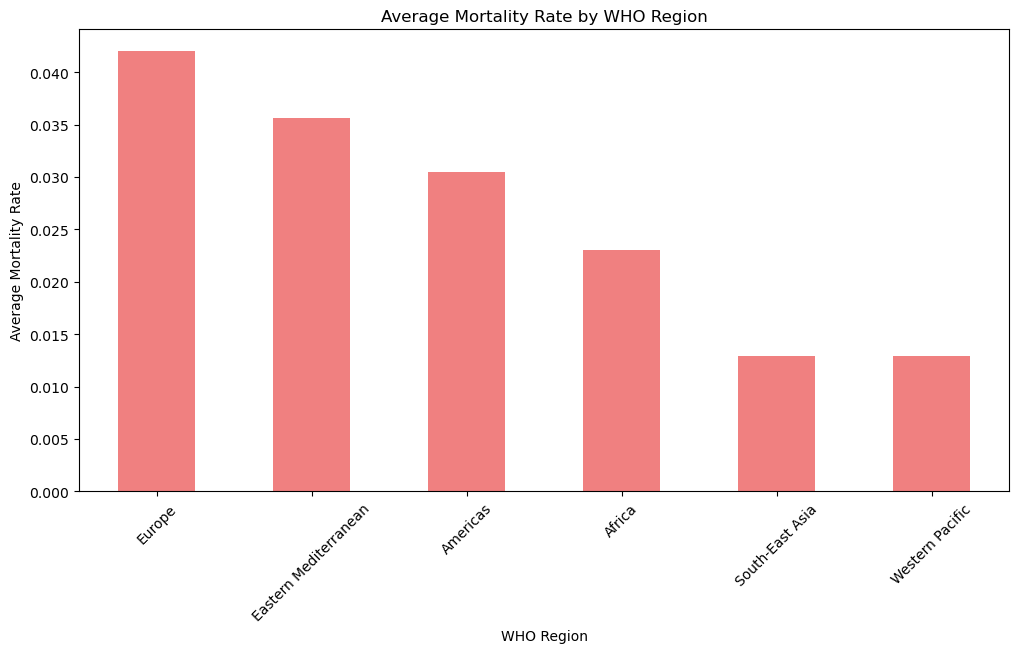

In [68]:
region_mortality_rate = df.groupby('WHO Region')['Mortality Ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
region_mortality_rate.plot(kind='bar', color='lightcoral')
plt.title('Average Mortality Rate by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Average Mortality Rate')
plt.xticks(rotation=45)
plt.show()


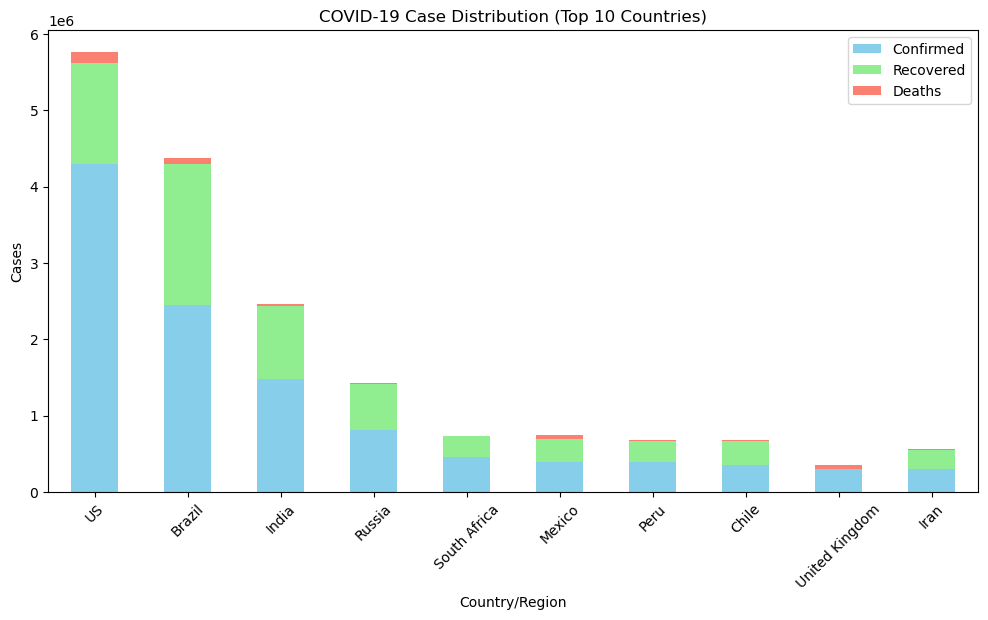

In [69]:
df_stacked = df[['Country/Region', 'Confirmed', 'Recovered', 'Deaths']].set_index('Country/Region')
df_stacked = df_stacked.loc[top_countries.index]  # Filter for top 10 countries
df_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('COVID-19 Case Distribution (Top 10 Countries)')
plt.xlabel('Country/Region')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()


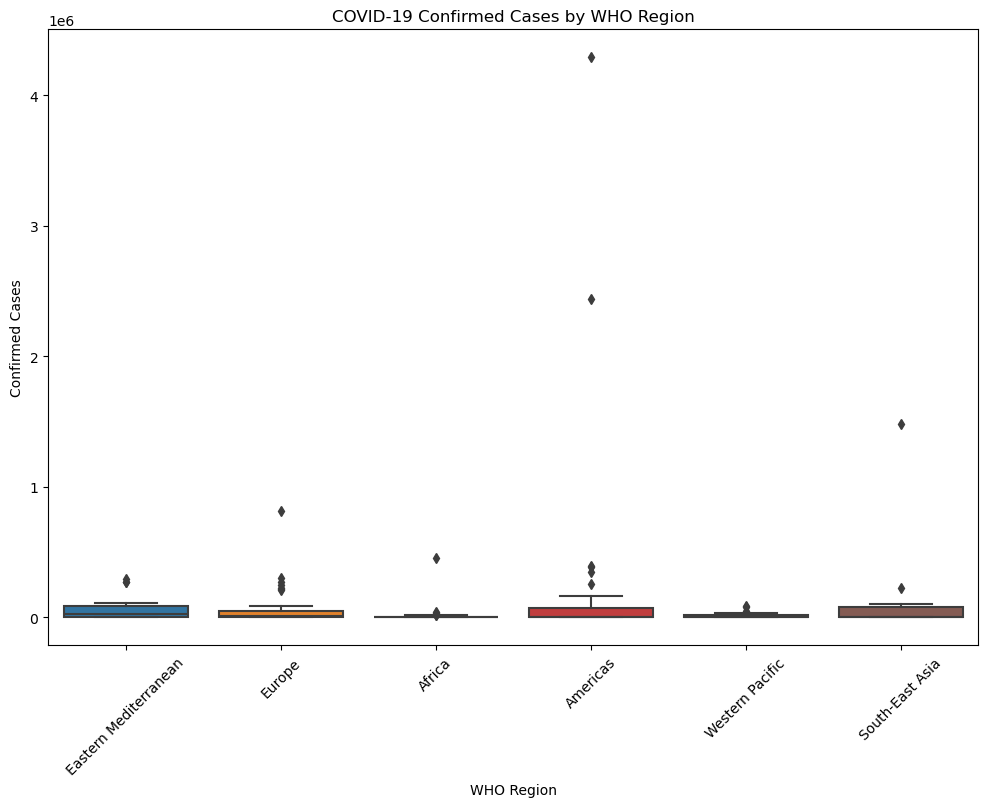

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('COVID-19 Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)  # To rotate the x-axis labels for better readability
plt.show()

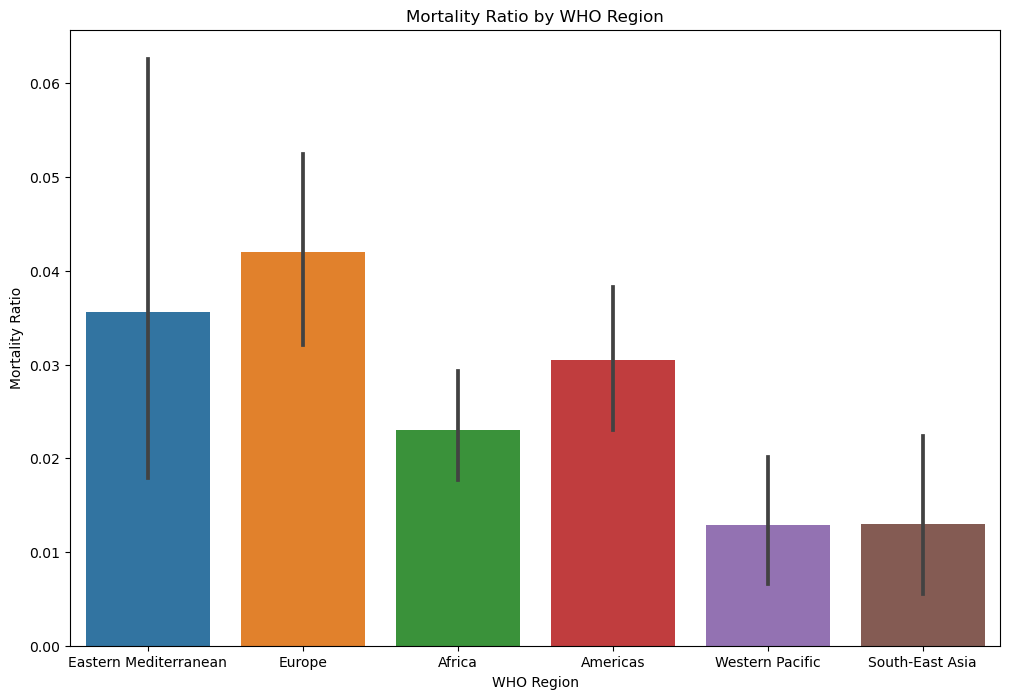

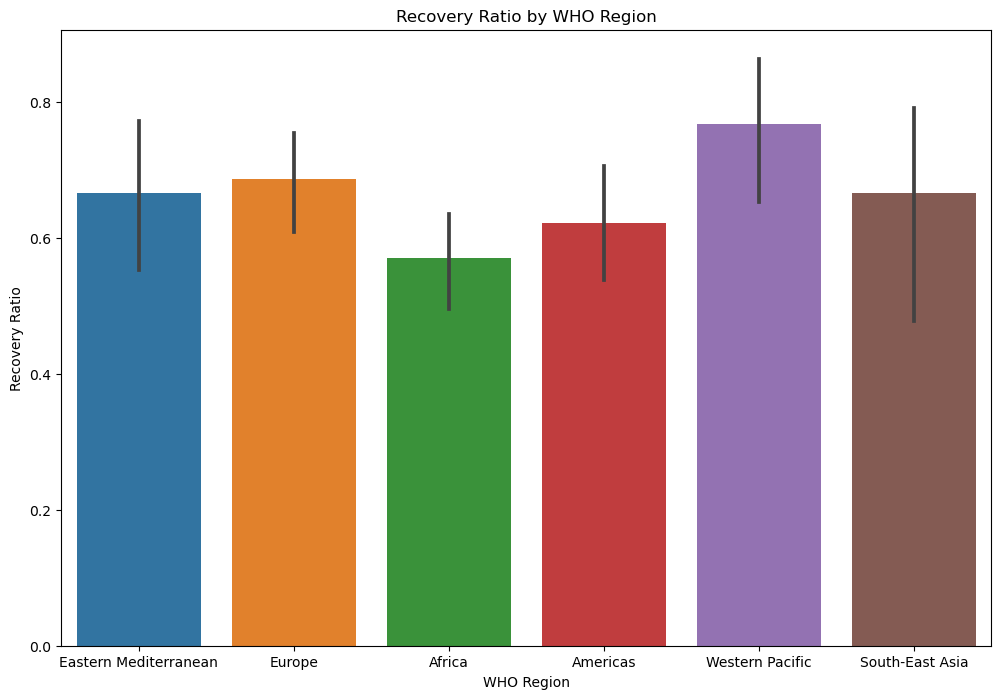

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(x='WHO Region', y='Mortality Ratio', data=df)
plt.title('Mortality Ratio by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Mortality Ratio')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='WHO Region', y='Recovery Ratio', data=df)
plt.title('Recovery Ratio by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Recovery Ratio')
plt.show()



C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


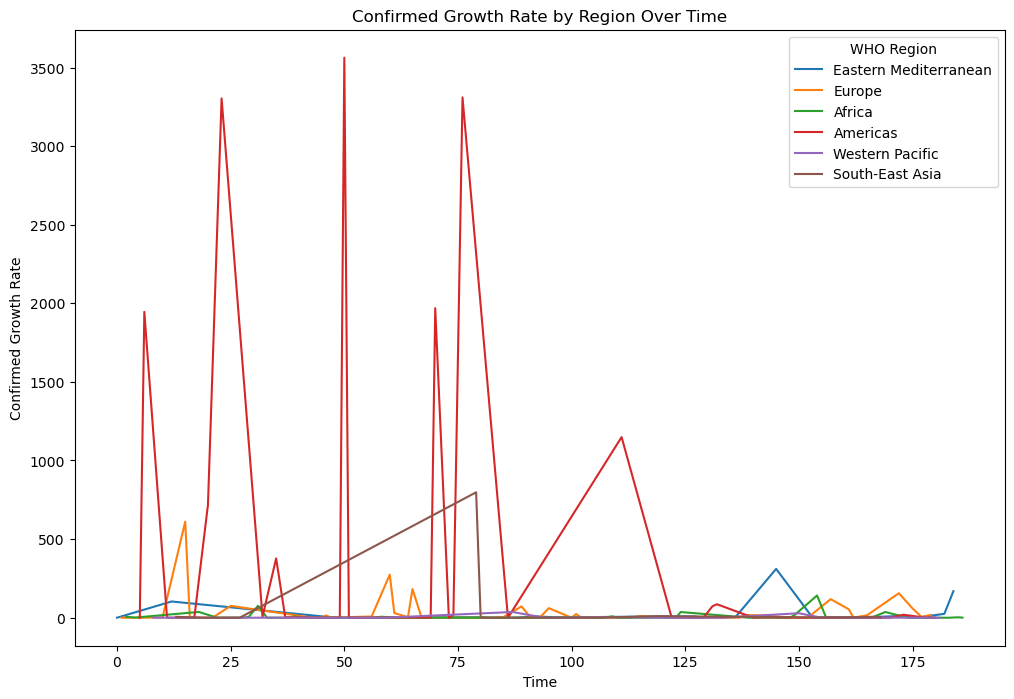

In [73]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Time', y='Confirmed Growth Rate', data=df, hue='WHO Region')
plt.title('Confirmed Growth Rate by Region Over Time')
plt.xlabel('Time')
plt.ylabel('Confirmed Growth Rate')
plt.show()


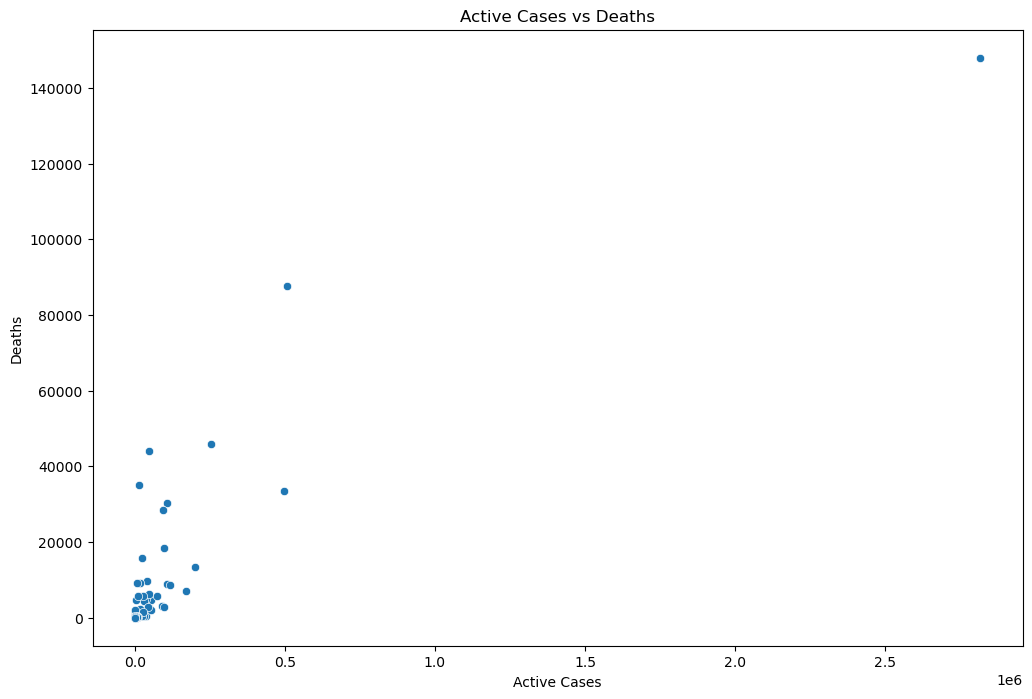

In [74]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Active', y='Deaths', data=df)
plt.title('Active Cases vs Deaths')
plt.xlabel('Active Cases')
plt.ylabel('Deaths')
plt.show()


In [76]:
# If your dataset does not have a 'Date' column, create one assuming daily intervals
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')


In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')  # Sort by date

# Selecting confirmed cases over time (we'll assume data is already cleaned)
time_series_data = df.groupby('Date')['Confirmed'].sum()  # Sum up by date (if multiple entries per date)


In [79]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series_data)
print(f'p-value: {result[1]}')


p-value: 2.5077912284047265e-25


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


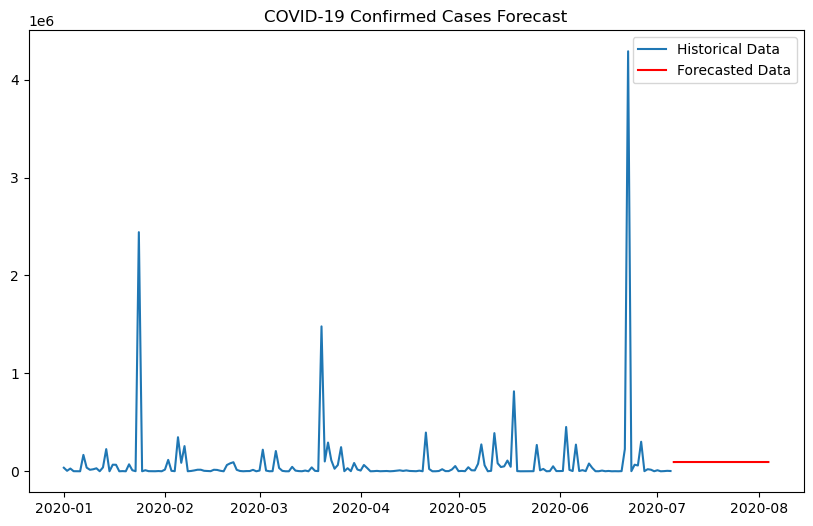

In [80]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 1, 1))  # You can adjust the order
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=time_series_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Historical Data')
plt.plot(forecast_series, label='Forecasted Data', color='red')
plt.legend()
plt.title('COVID-19 Confirmed Cases Forecast')
plt.show()


In [81]:
# For simplicity, let's classify whether a country has more than 1000 confirmed cases or not
df['High Cases'] = df['Confirmed'].apply(lambda x: 1 if x > 1000 else 0)

# Features for classification
features = ['New cases', 'New deaths', 'Active', 'Recovered', 'Deaths / 100 Cases', 'WHO Region']
X = df[features]
y = df['High Cases']

# Handle categorical features like 'WHO Region'
X = pd.get_dummies(X, drop_first=True)


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix: \n{cm}')


Accuracy: 1.00
Confusion Matrix: 
[[10  0]
 [ 0 28]]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        28

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[10  0]
 [ 0 28]]
